In [1]:
### modules used in the below
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from numpy.linalg import inv
import numpy as np
from numpy.linalg import det
from numpy.linalg import inv
from numpy.linalg import norm
from scipy.spatial import distance 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from copy import copy

## Problem 2 - Linear Regression

### Pseuodcode: 
* create synthetic data for two classes {0, 1} including x0 = 1
* divide into test and training data
* initilize weights at 0, including bias factor w0
* intilize a learning rate (try 0.01)
* create a loop for stochastic gradient descent
   1. Update the gradient function with new parameter values
   2. Calculate GRADIENT of linear regression and L2 norm: `grad = x.T(y-x*w) - alpha*w`
   3. Calculate the step size (step size = gradient * learning rate)
   4. Calculate the new parameters as new params = oldparams - step size
   5. Repeat until gradient = 0
* test results on test data


In [2]:
def randomsamples(d, size, up=1, down=-1, u=False, sig=False, condin = True, retall = False):
    """A function to generate random samples
        inputs: 
        d -> dimensions (int)
        size -> the size of the sample desired
        up -> the max of range of numbers to generate random 
            (default 1) 
        down -> the min of range of numbers to generate random
            (default -1)
        u -> optional input mean, a vector of size d
            (if not added, script will generate randomly)
        sig -> optional input covariance matrix, a matrix 
            of dimensions d*d
            (if not added, script will generate randomly)
        condin -> conditional independence boolean
            if True (default) then off-diagonal 
            values of sigma are zero
            if False, then any values in sigma
            may be a real number
        retall -> boolean for returning u and sigma
            True -> returns distribution, u, sig
            False -> returns distribution
            (default False)
        

        returns: 
        a multivariate matrix sample with gaussian distribution    
        
        and optionally u and sig
        """

    if u is False:
        ## means of dimensions 'd' [0, 1)
        u = np.random.uniform(down, up, size=(d,))
    
    if sig is False:
        ## covariance matrix of dimension 'd*d' [0,1)
        sig = np.random.uniform(down, up, size=(d,d))
        ## test for conditional independence
        if condin:
            sig = sig*np.identity(d)

    if retall:
        return np.random.multivariate_normal(u, sig, size).T, u, sig

    else:
        return np.random.multivariate_normal(u, sig, size).T

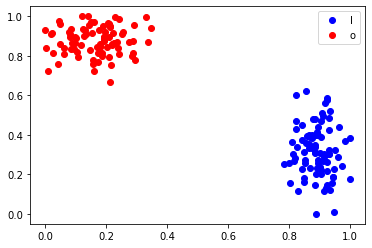

In [3]:
## synthetic data for two classes
## divide into test and train

# 1. globals 
d = 2 # dimensions
k = 100 # size of input
n = 15 # size of test subset
class_num = 2 # number of classes
up_in = 50 # upper bound of input data
down_in = -50 # lower bound of input data

# 2. create bivariate gaussian data with 2 known classes, that are conditionally independent! 
x_1 = randomsamples(d,k,up=up_in,down=down_in)
x_2 = randomsamples(d,k,up=up_in,down=down_in)


# # 3. rescale between 0 and 1
x_all = np.concatenate((x_1, x_2),axis=1)
# print(x_all.shape)
scaler = MinMaxScaler()
# x_1 = scaler.fit_transform(randomsamples(d,k,up=up_in,down=down_in).T).T
# x_2 = scaler.fit_transform(randomsamples(d,k,up=up_in,down=down_in).T).T
x_all = scaler.fit_transform(x_all.T).T
x_1 = x_all[:,:100]
x_2 = x_all[:,100:]

# 4. reserve some train and test sets (n number)
x_1_train, x_1_test = x_1[:,0:-n], x_1[:,-n:]
x_2_train, x_2_test = x_2[:,0:-n], x_2[:,-n:]
x_train_list = [x_1_train, x_2_train]
X = np.concatenate(x_train_list,axis=1).T # training data, predictors
y = np.array([np.full((k-n),0), np.full((k-n),1)]).flatten() # training data, target
# print(y.max())

x_test_list = [x_1_test, x_2_test]
x_pred = np.concatenate(x_test_list,axis=1).T
y_targ = np.array([np.full((n),0), np.full((n),1)]).flatten()

# 5. plot
# color list for graphing
color_list = ['b', 'r']
for cla in range(class_num):
    plt.plot(x_train_list[cla][0], x_train_list[cla][1], 'o', c=color_list[cla],label="class "+str(cla))

# plt.xlim(down_in*1.5, up_in*1.5)
# plt.ylim(down_in*1.5, up_in*1.5)
plt.legend('lower')
plt.show()

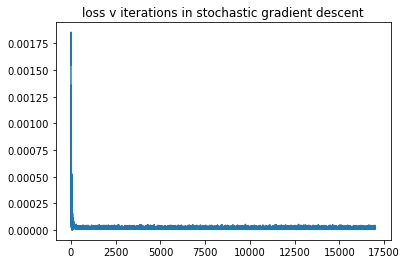

In [4]:
## SGD
# initilize weights at 0, including bias factor w0
w_n = np.ones(X.shape[1]+1)
# reset X_in to include the extra bias term
X_in = np.insert(X, 0, np.ones(X.shape[0])[0],axis=1).T
X_all = np.insert(X_in,0,y,axis=0)
# intilize a learning rate (trys 0.01)
alpha = 0.01
# initialize lambda
lam = 0.5
# termination criteria
c = 0.000000001
# initialize gradient
grad = np.array([10, 10, 10])
# keep track of number of steps
T = 100 # number of iterations
# keep track of length of input array
I = X_in.shape[1] # length of input array to iterate over
# keep track of loss
loss_l = []

for t in range(0, T): # loop through all time steps
    # print(t)
    np.random.shuffle(X_all.T) # random shuffle
    for i in range(0, I):
        x_in = X_all[1:,i] # x for comparison
        y_in = X_all[0,i] # y target
        w_o = w_n # reset old weights
        grad = -((y_in - np.dot(w_o,x_in))*x_in - lam*w_o) # calculate grad function 
        w_n = w_o - alpha*grad # take a step in the opposite direction of grad
        loss = np.sum((w_o - w_n)**2) # calculate how big the step was
        loss_l.append(loss) # save for later
        if loss <= c: # break once the step becomes small enough
            break

plt.plot(loss_l)
plt.title('loss v iterations in stochastic gradient descent')
# plt.yscale('log')
plt.show()

[0.27903831 0.34814185 0.32811779 0.21534603 0.27121672 0.26385028
 0.26725554 0.30027868 0.26391778 0.27036972 0.23792359 0.35927117
 0.30219229 0.19028312 0.31467637 0.56047341 0.56693284 0.54007479
 0.53284074 0.54572505 0.54936227 0.55737793 0.55916742 0.55906126
 0.55045784 0.56108262 0.52763432 0.53964286 0.54460004 0.57341937]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


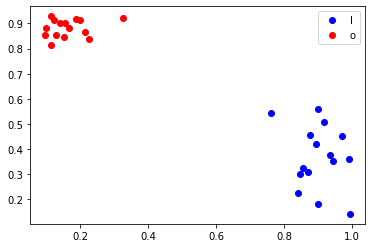

In [8]:
# classify test data

# test results
x_pred_in = np.insert(x_pred, 0, np.ones(x_pred.shape[0])[0],axis=1).T # input x
y_pred = np.dot(w_n,x_pred_in) # predicted values
y_targ # true values
print(y_pred)

# with classes = 0, 1: if > 0.5, class=0, else class=1
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1
print(y_pred)
print(y_targ)

# plot
# color list for graphing
color_list = ['b', 'r']
for cla in range(class_num):
    plt.plot(x_pred[:,0][y_pred == cla], x_pred[:,1][y_pred == cla], 'o', c=color_list[cla],label="class "+str(cla))
plt.legend('lower')
plt.show()

Generate Checkerboad dataset from two classes and use any density estimate technique to classify new dataset. 
Calculate `P(x|Y)` with a density estimator
Calculate `P(Y)` using a maximum likelihood estimator
Calculate `P(x)` using law of total probability (=1?)

### Recall that `pn(x)` = `p(x|Y)` = `(k/n)/v` = `1/nV * sumi(phi(x-xi)/h)`, where:

* `n` is the number of total samples in the population 
* `h` is the width of a Window
* `x` is a point to get p(x)
* `V` is a volume
* `phi` is a smoothing function

### Pseudocode for KNN to calculate `p(X|Y)`:

1. Create Function `pnx(k, x_array, x_target)` to:
    * Calculate Euclidean distance between `x_target` (scaler) and all elements in `x_array`
    * Sort results by closest
    * Select the kth closest
    * calculate 'V' volume = area = `pi*d_k^2`
    * return `pnx = k / n / V'

2. Loop through an array of `x_target` that are points evenly located in the sample space (<> `x_array`) **twice**, once for `y == 1`, and once for `y == 2`

3. Geneerate a plot using matplotlib function `pcolor`

### Workflow

- generate checkerboard dataset
- employ a 'maximum likelihood estimator' to calculate p(y)
- employ a density estimator like a Parzan Window to clculate P(x|y)
- Use law of total probability to calculate p(x)
- use psuedo color plot (https://goog.gl/2SDJPL) to show results

In [15]:
## functions 
def gen_cb(N, a, alpha):
    '''
    For generating a checkerboard dataset

    N: number of points on the checkerboard
    a: width of the checkbaord (0<a<1)
    alpha: rotation of the checkerboard in radians
    '''
    d = np.random.rand(N,2).T
    d_transformed = np.array([d[0]*np.cos(alpha)-d[1]*np.sin(alpha),
                              d[0]*np.sin(alpha)+d[1]*np.cos(alpha)]).T
    s = np.ceil(d_transformed[:,0]/a)+np.floor(d_transformed[:,1]/a)
    lab = 2 - (s%2)
    data = d.T 
    return data, lab

def dist(x_in, x_comp):
    '''
    Calculates the magnitude of the distance between two points x_in and x_comp
    x_in: vector of dimension (m,)
    x_comp: matrix of dimension (m,n) with n>=0
    '''
    return np.sqrt(np.sum((x_in-x_comp)**2,axis=1))

def pnx(k, n, x_array, x_target):
    '''
    a fuction for K nearest neighbors

    For calculating pnx (likelihood)
    x_array: array of variables of dimension (m,n) with n>=0
    x_target: vector of dimension (m,) to compare to x_array
    n: total number of samples in sample space (for all classes)
    k: how many samples to fit into a window
    '''
    # calculate euclian distance vector
    euclid = dist(x_target, x_array)
    # print('euclid', euclid)
    # sort results by closest
    arr1inds = euclid.argsort()
    # print('arr index', arr1inds)
    x_array_sorted = x_array[arr1inds[:k]] # just for giggles
    # print('x_array_sorted', x_array_sorted)
    euclid_sorted = euclid[arr1inds[:k]] # necessary for next calculation
    # print('euclid sorted', euclid_sorted)
    # select the kth closest
    d_k = euclid_sorted[k-1]
    # print('distance of kth', d_k)
    # calculate V = pi*d_k**2 (equation for a circle)
    V = np.pi*d_k**2
    # print('V', V)
    # return pnx = k / n / V
    return k/n/V

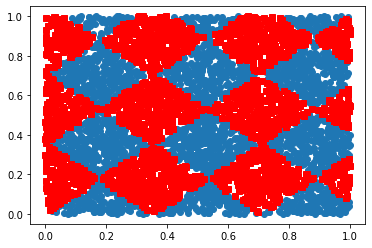

In [16]:
## generate checkerboard dataset with 2D x1, and x2 of classes y=1, and y=2
X, y = gen_cb(5000,0.25,3.14159/4)
plt.figure()
plt.plot(X[np.where(y==1)[0], 0], X[np.where(y==1)[0], 1], 'o')
plt.plot(X[np.where(y==2)[0], 0], X[np.where(y==2)[0], 1], 's', c = 'r')
plt.show()

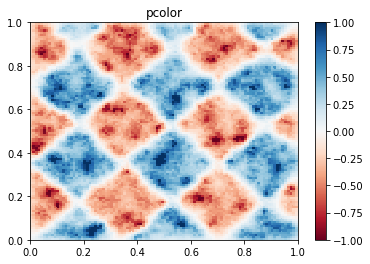

In [17]:
# calculate likelihood using density estimator
# x_target = np.array([(0.5,0.4)])
x_array = X[np.where(y==1)[0], :]
x_array2 = X[np.where(y==2)[0], :]
k = 15
n = len(y)

# calculate likelihood 
py1 = len(x_array)/n # y = 1
py2 = len(x_array2)/n # y = 2
# print(py1, py2)

# create a mesh of x1, x2 locations
dx, dy = 0.01, 0.01
x_0, x_1 = np.mgrid[slice(0, 1 + dx, dx),
                slice(0, 1 + dy, dy)]
# print(x_1.shape)

# set up an empty array to put in probabilities
z1 = np.zeros(x_0[:-1,:-1].shape)
z2 = np.zeros(x_0[:-1,:-1].shape)
# print(z.shape)

# loop through points to create z for plotting
for i in range(len(z1)):
    for j in range(len(z1)): # 
        x_target = np.array([x_0[j,0]+dx/2, x_1[0,i]+dy/2])
        # print('x target', x_target)
        pxy1 = pnx(k=k, n=n, x_array=x_array, x_target=x_target) # where y = 1
        # print('pxy1', pxy1)
        pxy2 = pnx(k=k, n=n, x_array=x_array2, x_target=x_target) # where y = 2
        # print('pxy2', pxy2)
        z1[j,i] = pxy1*py1 # set probability class = 1
        z2[j,i] = pxy2*py2 # set probability class = 2

        del pxy1, pxy2, x_target

z = z1-z2

# make a plot
plt.subplot()
plt.pcolor(x_0, x_1, z, cmap='RdBu', vmin=-1, vmax=1, alpha=1)
plt.title('pcolor')
# set the limits of the plot to the limits of the data
plt.axis([x_0.min(), x_0.max(), x_1.min(), x_1.max()])
plt.colorbar()
plt.show()
